<a href="https://colab.research.google.com/github/areias/viral-escape/blob/main/gisaid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Roberta Transformer Model on Gisaid data up to April 4th, 2020
* train bert model on sequences 
* plot embeddings


## Data 

In [ ]:
#import datetime
#print("Gisaid data downloaded " + str(datetime.datetime.now()))

Gisaid data downloaded 2022-04-04 09:36:01.056281


In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!mkdir drive/MyDrive/gisaid/data

In [4]:
! tar -xf drive/MyDrive/gisaid/spikeprot0403.tar.tar.xz -C drive/MyDrive/gisaid/data/

In [6]:
! tar -xf drive/MyDrive/gisaid/data/spikeprot0403.tar -v -C drive/MyDrive/gisaid/data/

METHOD_for_generating_allprot_spikeprot.txt
FASTA_header_format_for_allprot_spikeprot.txt
spikeprot0403.fasta


In [159]:
! tar -xf drive/MyDrive/gisaid/metadata_tsv_2022_04_02.tar.xz -C drive/MyDrive/gisaid/data/


In [ ]:
! cat drive/MyDrive/gisaid/data/FASTA_header_format_for_allprot_spikeprot.txt

FASTA header format:
>Gene name|Isolate name|YYYY-MM-DD|Isolate ID|Passage details/history|Type^^location/state|Host|Originating lab|Submitting lab|Submitter|Location


In [7]:
! cat drive/MyDrive/gisaid/data/METHOD_for_generating_allprot_spikeprot.txt

The protein sequences found in allprot.MMDD.fasta and spikeprot.MMDD.fasta are based on all (unfiltered) submissions to EpiCoV. Each nucleotide genome is individually aligned to the reference hCoV-19/Wuhan/WIV04/2019 (EPI_ISL_402124) using mafft https://doi.org/10.1093/molbev/mst010 with the command:
mafft --thread 1 --quiet input.fasta > output.fasta

For each of the aligned sequences, we retrieved the coding sequences for each protein based on the following boundary positions in the hCoV-19/Wuhan/WIV04/2019 reference:
"NSP1","266-805",
"NSP2","806-2719",
"NSP3","2720-8554",
"NSP4","8555-10054",
"NSP5","10055-10972",
"NSP6","10973-11842",
"NSP7","11843-12091",
"NSP8","12092-12685",
"NSP9","12686-13024",
"NSP10","13025-13441",
"NSP11","13442-13480",
"NSP12","13442-13468|13468-16236",
"NSP13","16237-18039",
"NSP14","18040-19620",
"NSP15","19621-20658",
"NSP16","20659-21552",
"Spike","21563-25384",
"NS3","25393-26220",
"E","26245-26472",
"M","26523-27191",
"NS6","27202-27387",
"NS7a","27

In [125]:
! pip install bio

In [126]:
from Bio import Seq, SeqIO


In [232]:
fnames=['drive/MyDrive/gisaid/data/spikeprot0403.fasta']
seqs = {}
for fname in fnames:
    i =0 
    for record in SeqIO.parse(fname, 'fasta'):
        #print(record.description)
        if record.seq not in seqs:
            seqs[record.seq] = []
        id = record.description.split('|')[3]
        seqs[record.seq].append(id)    
        i+=1
        if i >50000:
            break

In [233]:
ids=[x[1] for x in  seqs.items()]
len(ids)

13476

In [234]:
flat_list = [item for sublist in ids for item in sublist]

In [235]:
len(flat_list)

50001

In [236]:
! ls drive/MyDrive/gisaid/data

FASTA_header_format_for_allprot_spikeprot.txt  readme.txt
metadata.tsv				       spikeprot0403.fasta
METHOD_for_generating_allprot_spikeprot.txt    spikeprot0403.tar


In [ ]:
meta_fnames=['drive/MyDrive/gisaid/data/metadata.tsv']

metas={}
for fname in meta_fnames:
    with open(fname) as f:
        header = f.readline().rstrip().split('\t')
        for line in f:
            fields = line.rstrip().split('\t')
            accession = fields[2]
            meta = {}
            if accession in flat_list:  
                for key, value in zip(header, fields):
                    meta[key] = value
                metas[accession] = meta
            if len(metas)==len(flat_list):
                break



In [ ]:
len(metas)

In [ ]:
%%time
from collections import defaultdict
final_seqs=defaultdict(dict)
for item in seqs.items():
    key=item[0]
    values=item[1]
    if key not in final_seqs:
                final_seqs[key] = []
    for val in values:
        final_seqs[key].append(metas[val])

In [ ]:
len(final_seqs)

In [185]:
val

{'AA Substitutions': '()',
 'Accession ID': 'EPI_ISL_402124',
 'Additional location information': 'Retailer at Huanan Seafood Wholesale Market',
 'Clade': 'L',
 'Collection date': '2019-12-30',
 'GC-Content': '0.379880231508',
 'Gender': 'Female',
 'Host': 'Human',
 'Is complete?': 'True',
 'Is high coverage?': 'True',
 'Is low coverage?': '',
 'Is reference?': 'True',
 'Location': 'Asia / China / Hubei / Wuhan',
 'N-Content': '',
 'Pango lineage': 'B',
 'Pangolin version': '2022-02-28',
 'Patient age': '49',
 'Sequence length': '29891',
 'Submission date': '2020-01-11',
 'Type': 'betacoronavirus',
 'Variant': '',
 'Virus name': 'hCoV-19/Wuhan/WIV04/2019'}

In [108]:
[x for x in flat_list]

['EPI_ISL_402124',
 'EPI_ISL_2155626',
 'EPI_ISL_940774',
 'EPI_ISL_1097311',
 'EPI_ISL_960831',
 'EPI_ISL_1179245',
 'EPI_ISL_1178570',
 'EPI_ISL_1178071',
 'EPI_ISL_1180165',
 'EPI_ISL_1179150',
 'EPI_ISL_1178665']

In [123]:
for seq in seqs.keys():
    for y in seqs[x]:
        print(seqs[seq])
        #seqs[seq].append(metas[y])

['EPI_ISL_402124', {'Virus name': 'hCoV-19/England/NOTT-2518BB/2021', 'Type': 'betacoronavirus', 'Accession ID': 'EPI_ISL_1178665', 'Collection date': '2021-02-15', 'Location': 'Europe / United Kingdom / England', 'Additional location information': '', 'Sequence length': '29763', 'Host': 'Human', 'Patient age': 'unknown', 'Gender': 'unknown', 'Clade': 'GRY', 'Pango lineage': 'B.1.1.7', 'Pangolin version': '2022-02-28', 'Variant': 'VOC Alpha GRY (B.1.1.7+Q.*) first detected in the UK', 'AA Substitutions': '(Spike_H69del,NS8_Q27stop,NSP3_T183I,NSP3_V473F,Spike_T716I,NSP6_S106del,N_R203K,Spike_A570D,Spike_N501Y,NSP16_D179G,NSP3_I1412T,NS8_R52I,Spike_P681H,Spike_Y144del,Spike_F565L,NSP2_L550F,NSP6_G107del,NSP3_A890D,Spike_D1118H,NSP6_F108del,NS8_Y73C,N_G204R,Spike_V70del,NSP12_P323L,Spike_D614G,N_D3L,Spike_S982A,N_S235F)', 'Submission date': '2021-03-08', 'Is reference?': '', 'Is complete?': 'True', 'Is high coverage?': 'True', 'Is low coverage?': '', 'N-Content': '', 'GC-Content': '0.3798

In [41]:
import pandas as pd
df = pd.DataFrame(metas)

In [42]:
df = df.transpose()

In [43]:
df= df.reset_index()

In [44]:
df.head()

,index,Virus name,Type,Accession ID,Collection date,Location,Additional location information,Sequence length,Host,Patient age,...,Pangolin version,Variant,AA Substitutions,Submission date,Is reference?,Is complete?,Is high coverage?,Is low coverage?,N-Content,GC-Content
0,EPI_ISL_7447690,hCoV-19/USA/CA-CDC-FG-181575/2021,betacoronavirus,EPI_ISL_7447690,2021-11-28,North America / USA / California,,29845,Human,43,...,2022-02-28,VOC Delta GK (B.1.617.2+AY.*) first detected i...,"(N_G215C,N_D63G,N_R203M,NSP12_G671S,Spike_G142...",2021-12-09,,True,True,,0.000100519349975,0.37943167348
1,EPI_ISL_7447691,hCoV-19/USA/CA-CDC-FG-181559/2021,betacoronavirus,EPI_ISL_7447691,2021-11-28,North America / USA / California,,29812,Human,56,...,2022-02-28,VOC Delta GK (B.1.617.2+AY.*) first detected i...,"(N_G215C,N_D63G,N_A208S,N_R203M,NSP12_G671S,NS...",2021-12-09,,True,True,,0.000100630618543,0.379583347311
2,EPI_ISL_7447693,hCoV-19/USA/CA-CDC-FG-181510/2021,betacoronavirus,EPI_ISL_7447693,2021-11-28,North America / USA / California,,29800,Human,61,...,2022-02-28,VOC Delta GK (B.1.617.2+AY.*) first detected i...,"(N_G215C,N_D63G,N_R203M,NSP12_G671S,Spike_G142...",2021-12-09,,True,True,,0.00369164681008,0.379492707246
3,EPI_ISL_4941720,hCoV-19/England/ALDP-1FEF30C/2021,betacoronavirus,EPI_ISL_4941720,2021-09-29,Europe / United Kingdom / England,,29769,Human,unknown,...,2022-02-28,VOC Delta GK (B.1.617.2+AY.*) first detected i...,"(NSP16_A116V,N_G215C,NSP3_A1711V,Spike_T95I,N_...",2021-10-07,,True,True,,,0.379522321878
4,EPI_ISL_4941721,hCoV-19/England/MILK-1FFD6F3/2021,betacoronavirus,EPI_ISL_4941721,2021-09-30,Europe / United Kingdom / England,,29769,Human,unknown,...,2022-02-28,VOC Delta GK (B.1.617.2+AY.*) first detected i...,"(N_G215C,N_D63G,N_R203M,NSP12_P21S,NSP12_G671S...",2021-10-07,,True,True,,0.0069537758667,0.379689455702


In [45]:
df.columns

Index(['index', 'Virus name', 'Type', 'Accession ID', 'Collection date',
       'Location', 'Additional location information', 'Sequence length',
       'Host', 'Patient age', 'Gender', 'Clade', 'Pango lineage',
       'Pangolin version', 'Variant', 'AA Substitutions', 'Submission date',
       'Is reference?', 'Is complete?', 'Is high coverage?',
       'Is low coverage?', 'N-Content', 'GC-Content'],
      dtype='object')

In [46]:
df['Pango lineage'].value_counts()

AY.103       1838
AY.44        1573
AY.43        1391
AY.4         1192
AY.122        844
             ... 
B.1.243.2       1
AY.38           1
AY.40           1
AY.103.1        1
B.1.177.5       1
Name: Pango lineage, Length: 361, dtype: int64

In [47]:
df['Clade'].value_counts()

GK     14915
GH      2237
G       1191
GR       844
GRA      571
GV       100
O         90
GRY       47
S          5
Name: Clade, dtype: int64

In [48]:
df['Variant'].value_counts()

VOC Delta GK (B.1.617.2+AY.*) first detected in India                                 15497
                                                                                       2993
VOC Omicron GRA (B.1.1.529+BA.*) first detected in Botswana/Hong Kong/South Africa      561
VOC Alpha GRY (B.1.1.7+Q.*) first detected in the UK                                    424
VOI Epsilon GH/452R.V1 (B.1.429+B.1.427) first detected in USA/California               160
VOI Iota GH/253G.V1 (B.1.526) first detected in USA/New York                            154
VOI Mu GH (B.1.621+B.1.621.1) first detected in Colombia                                118
VOC Gamma GR/501Y.V3 (P.1+P.1.*) first detected in Brazil/Japan                          24
VOI Eta G/484K.V3 (B.1.525) first detected in UK/Nigeria                                 24
VOC Beta GH/501Y.V2 (B.1.351+B.1.351.2+B.1.351.3) first detected in South Africa         21
VOI Zeta GR/484K.V2 (P.2) first detected in Brazil                              

In [49]:
df['Location'].value_counts()

North America / USA / California                                 1316
North America / USA / Massachusetts                              1276
Europe / France / Provence-Alpes-Cote d'Azur / Marseille         1215
Europe / France / Provence-Alpes-Cote-d’Azur / Marseille          871
Europe / United Kingdom / England                                 783
                                                                 ... 
Europe / Czech Republic / Ustecky Region / Blsany                   1
Europe / Czech Republic / Zlin Region / Vizovice                    1
Europe / Czech Republic / Zlin Region / Biskupice u Luhacovic       1
Europe / Czech Republic / Zlin Region / Napajedla                   1
Europe / Norway / Agder                                             1
Name: Location, Length: 523, dtype: int64

In [50]:
df['Submission date']=pd.to_datetime(df['Submission date'])

In [51]:
df.groupby('Submission date')['index'].count()

Submission date
2020-08-25        1
2020-10-27        1
2021-01-15        4
2021-02-26       11
2021-02-27       22
2021-03-01        9
2021-03-18       44
2021-04-22        1
2021-05-04        2
2021-06-08        2
2021-06-27        1
2021-07-19        1
2021-08-30        1
2021-09-08        6
2021-09-11        1
2021-10-06        1
2021-10-07    11171
2021-10-08     2163
2021-10-28       46
2021-11-20        6
2021-11-21       15
2021-11-23       61
2021-12-09     3679
2021-12-10     2163
2021-12-14        1
2021-12-22        5
2022-01-10        5
2022-01-12        1
2022-01-16        4
2022-01-18        1
2022-01-19        1
2022-01-25       79
2022-01-26       10
2022-01-27        3
2022-01-31        2
2022-02-01      167
2022-02-02       74
2022-02-03        2
2022-02-08        3
2022-02-16      135
2022-02-20       51
2022-02-24        9
2022-02-25       10
2022-03-03        3
2022-03-11        9
2022-03-17        1
2022-03-18        3
2022-03-22        9
Name: index, dtype: int6

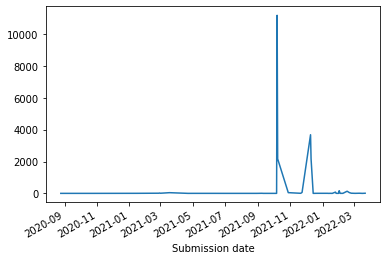

In [52]:
df.groupby('Submission date')['index'].count().plot()

In [53]:
len(df)


20000